In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import random
import numpy as np
import copy

%matplotlib inline
%config InlineBackend.figure_format ='retina'

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

In [2]:
images, labels = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

In [3]:
train_test_split?

In [4]:
train_images, test_images, train_labels, test_labels = \
            train_test_split(images, labels, random_state=42) #train_size=10000, stratify=labels

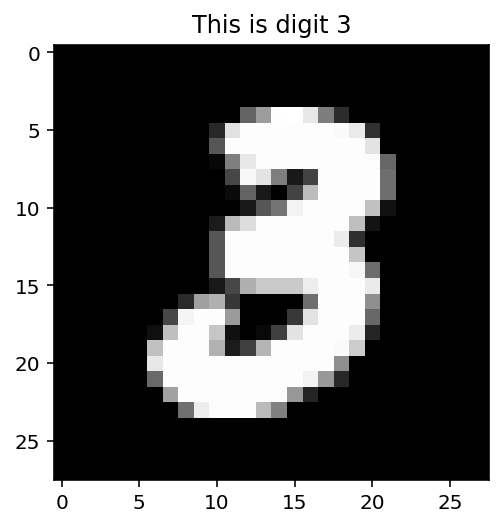

In [5]:
SAMPLE_NUM = 777

plt.imshow(train_images[SAMPLE_NUM].reshape(28, 28), cmap='gray')
plt.title(f'This is digit {train_labels[SAMPLE_NUM]}')
plt.show()

To plot everything in grayscale:

In [6]:
# plt.gray()
# or
plt.rcParams['image.cmap'] = 'gray'

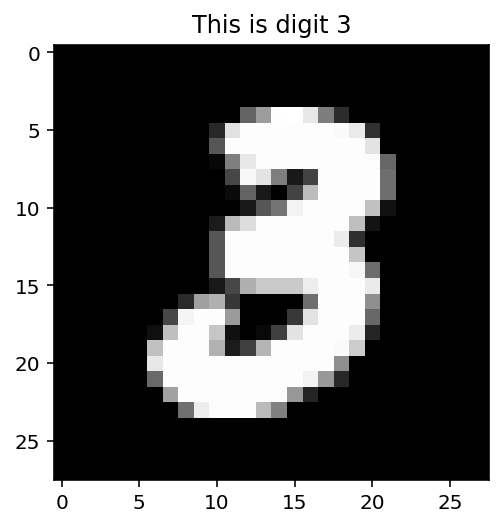

In [7]:
plt.imshow(train_images[SAMPLE_NUM].reshape(28, 28))
plt.title(f'This is digit {train_labels[SAMPLE_NUM]}')
plt.show()

Q. 1. Compute the baseline 1 -NN classification accuracy, which is defined as the percentage of samples correctly classified in the testing set;

In [8]:
def select_with_label(images, labels, desired_labels):
    mask = np.isin(labels, desired_labels)
    return images[mask], labels[mask]

images_of_two, labels_of_two = \
            select_with_label(train_images, train_labels, desired_labels=['2'])
images_of_odd, labels_of_odd = \
            select_with_label(train_images, train_labels, desired_labels=['1', '3', '5', '7', '9'])

In [9]:
np.unique(labels_of_two)

array(['2'], dtype=object)

In [44]:
images_of_0_1_2_3_4, labels_of_0_1_2_3_4  = select_with_label(train_images, train_labels, desired_labels=['0', '1', '2', '3', '4'])

rng = random.sample(range(images_of_0_1_2_3_4.shape[0]), 5000)
images_of_0_1_2_3_4_5k = images_of_0_1_2_3_4[rng,:] # 5k random images of all 5 labels
labels_of_0_1_2_3_4_5k = labels_of_0_1_2_3_4[rng] # 5k labels for checking

images_of_0_1_2_3_4_train = np.delete(images_of_0_1_2_3_4, rng, 0)
labels_of_0_1_2_3_4_train = np.delete(labels_of_0_1_2_3_4, rng, 0)

In [45]:
def nearestNeiClass(train_x, train_y, test_x):
    nbrs = NearestNeighbors(n_neighbors=1, algorithm='auto')
    nbrs.fit(train_x)
    _, prediction = nbrs.kneighbors(test_x)
    return train_y[prediction]

def countRes(a1, a2):
    return np.sum([1 for i in range(len(a1)) if a1[i] == a2[i]])

In [46]:
pred_y = nearestNeiClass(images_of_0_1_2_3_4_train, labels_of_0_1_2_3_4_train, images_of_0_1_2_3_4_5k)

In [49]:
print("accuracy of 1-NN classifier is : ", countRes(pred_y, labels_of_0_1_2_3_4_5k)/pred_y.shape[0])

accuracy of 1-NN classifier is :  0.9898


Q. 2. (PCA + 1 -NN) Repeat the following task for each -> 𝑚 = 10, 20, 30, 40, 50, 100, 150, 200, 250, . . . , 750

In [63]:
pca = PCA()
pca.fit(images_of_0_1_2_3_4_train)
mean = pca.mean_
cov = pca.get_covariance()
values, vectors = np.linalg.eig(cov)
idx = values.argsort()[::-1]
values, vectors = values[idx], vectors[:,idx]

In [64]:
def reconstruction(x, nb_comp, mean, pca):
    x_rec_all = []
    pcaComponents = pca.components_
    projection = (x-mean)@(pcaComponents.T)
    x_rec = (projection[:,:nb_comp])@(pcaComponents[:nb_comp]) + mean
    return x_rec

In [66]:
m = [10, 20, 30, 40, 50, 100, 150, 200, 250, 350, 450, 550, 650, 750]
acc = []
for nb in m:
    print(nb)
    rec_img_train = reconstruction(images_of_0_1_2_3_4_train, nb, mean, pca)
    rec_img_test = reconstruction(images_of_0_1_2_3_4_5k, nb, mean, pca)
    pred_y = nearestNeiClass(rec_img_train, labels_of_0_1_2_3_4_train, rec_img_test)
    acc.append(countRes(pred_y, labels_of_0_1_2_3_4_5k)/pred_y.shape[0])

10
20
30
40
50
100
150
200
250
350
450
550
650
750


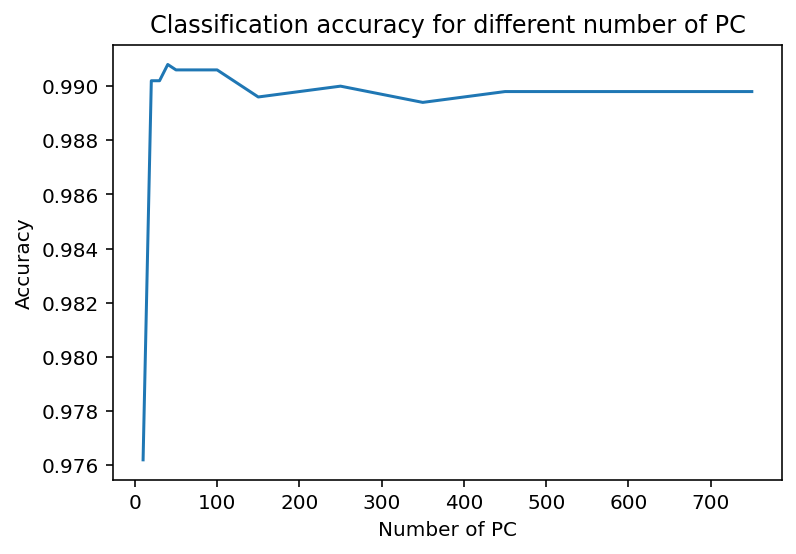

0.9908
3
40


In [72]:
plt.plot(m, acc)
plt.title('Classification accuracy for different number of PC')
plt.ylabel('Accuracy')
plt.xlabel('Number of PC')
plt.show()
print(np.max(acc))
print(np.argmax(acc))
print(m[np.argmax(acc)])